## **1 - Importing Libraries & Utilities**

In [ ]:
from google.colab import files
!pip install pandas==1.5.3
#
import pandas as pd
import numpy as np
import os
from IPython.display import clear_output
!pip install vaex
import vaex
clear_output()
from time import sleep, perf_counter
from datetime import timedelta
from google.colab import files, drive
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
drive.mount('/content/drive')
path_files = '/content/drive/MyDrive/2023_DSMP_Project/Merged Datasets'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2 - Uploading Required Data File**

In [ ]:
start = perf_counter()
df = pd.read_excel(path_files+'/'+'Alberta_EP_Daily_Macro_Econ.xlsx', header=0) #
#df = vaex.from_pandas(pd.read_excel(path_files+'/'+'Alberta_EP_Daily_Macro_Econ.xlsx', header=0))
dura_ = (perf_counter()-start)/60
print(dura_)
#
df = df[df['Scenario']=='Current Measures']
del df['Scenario']
print('df_shape =', df.shape)
df.head(5)

,Sources,Time,Primary Demand - Petajoules,Electricity Generation - (GWh),Electricity Capacity - (GWh),Interchange Flows,Interchange (GWh),Sector,End-Use Demand (PetaJoules),GHG Emisions (KTons_CO2_Equivalent),...,Temp_Max (°F),Temp_Avg (°F),Temp_Min (°F),Hum_Max (%),Hum_Avg (%),Hum_Min (%),Wind_Speed_Max (mph),Wind_Speed_Avg (mph),Wind_Speed_Min (mph),Price (CAD $/GJ)
0,Natural Gas,2014-01-01,2642.5450,45356.3700,8754.2300,Exports,191.0575,Residential,38.3800,4.607213,...,12,4.5,-2,85,79.6,72,15,7.2,2,49.4675
2,Renewable Energies_Biomass,2014-01-01,153.6675,10476.9975,3519.9275,Imports,659.3025,Residential,38.3800,0.000000,...,12,4.5,-2,85,79.6,72,15,7.2,2,49.4675
3,Nuclear,2014-01-01,0.0000,0.0000,0.0000,Interprovincial Out-Flows,0.0000,Industrial,173.6425,0.000000,...,12,4.5,-2,85,79.6,72,15,7.2,2,0.0000
5,"Coal, Coke and Coke Oven Gas",2014-01-01,259.2000,26385.7250,4135.2750,Interprovincial Out-Flows,1955.1200,Commercial,61.3625,7.478482,...,12,4.5,-2,85,79.6,72,15,7.2,2,44.2975
6,"Coal, Coke and Coke Oven Gas",2014-01-01,259.2000,26385.7250,4135.2750,Interprovincial In-Flows,3212.4725,Industrial,173.6425,20.854401,...,12,4.5,-2,85,79.6,72,15,7.2,2,38.8700


In [ ]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(219060, 22)

### **2.1 - Feature Engineering**

In [ ]:
# Adding new features
periods = ['Year', 'Month', 'Day']
df['Year'] = pd.to_datetime(df['Time']).dt.year
df['Month'] = pd.to_datetime(df['Time']).dt.month
df['Day'] = pd.to_datetime(df['Time']).dt.day_name()
#
df['Clean_Energy'] = df['GHG Emisions (KTons_CO2_Equivalent)'].apply(lambda x: 'Yes' if x==0 else 'No')
#
new_cols = periods
new_cols.append('Clean_Energy')
#
for col in list(df.columns)[:-4]:
  new_cols.append(col)
#new_cols.remove('Time')
df = df[new_cols]
print('df_shape =', df.shape)
df.head(5)

df_shape = (219060, 26)


,Year,Month,Day,Clean_Energy,Sources,Time,Primary Demand - Petajoules,Electricity Generation - (GWh),Electricity Capacity - (GWh),Interchange Flows,...,Temp_Max (°F),Temp_Avg (°F),Temp_Min (°F),Hum_Max (%),Hum_Avg (%),Hum_Min (%),Wind_Speed_Max (mph),Wind_Speed_Avg (mph),Wind_Speed_Min (mph),Price (CAD $/GJ)
0,2014,1,Wednesday,No,Natural Gas,2014-01-01,2642.5450,45356.3700,8754.2300,Exports,...,12,4.5,-2,85,79.6,72,15,7.2,2,49.4675
2,2014,1,Wednesday,Yes,Renewable Energies_Biomass,2014-01-01,153.6675,10476.9975,3519.9275,Imports,...,12,4.5,-2,85,79.6,72,15,7.2,2,49.4675
3,2014,1,Wednesday,Yes,Nuclear,2014-01-01,0.0000,0.0000,0.0000,Interprovincial Out-Flows,...,12,4.5,-2,85,79.6,72,15,7.2,2,0.0000
5,2014,1,Wednesday,No,"Coal, Coke and Coke Oven Gas",2014-01-01,259.2000,26385.7250,4135.2750,Interprovincial Out-Flows,...,12,4.5,-2,85,79.6,72,15,7.2,2,44.2975
6,2014,1,Wednesday,No,"Coal, Coke and Coke Oven Gas",2014-01-01,259.2000,26385.7250,4135.2750,Interprovincial In-Flows,...,12,4.5,-2,85,79.6,72,15,7.2,2,38.8700


In [ ]:
df.describe()

,Year,Month,Primary Demand - Petajoules,Electricity Generation - (GWh),Electricity Capacity - (GWh),Interchange (GWh),End-Use Demand (PetaJoules),GHG Emisions (KTons_CO2_Equivalent),Population,Real Gross Domestic Product ($2012 Millions),Temp_Max (°F),Temp_Avg (°F),Temp_Min (°F),Hum_Max (%),Hum_Avg (%),Hum_Min (%),Wind_Speed_Max (mph),Wind_Speed_Avg (mph),Wind_Speed_Min (mph),Price (CAD $/GJ)
count,219060.000000,219060.000000,219060.000000,219060.000000,219060.000000,219060.000000,219060.000000,219060.000000,2.190600e+05,2.190600e+05,219060.000000,219060.000000,219060.000000,219060.000000,219060.000000,219060.000000,219060.000000,219060.000000,219060.000000,219060.000000
mean,2018.499315,6.522323,858.076654,15617.946075,3119.946140,1204.907846,88.044613,6.908445,4.341777e+06,2.005779e+06,48.043276,37.523035,26.072035,90.401260,72.078307,50.921391,15.970419,8.549055,2.148726,36.737997
std,2.872192,3.448217,967.490427,16249.549980,3047.030536,1370.333158,57.502920,8.126496,2.071319e+05,5.463010e+04,23.497573,21.401567,20.577722,9.294279,12.793809,18.126552,5.724367,3.312889,2.466558,19.869709
min,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.982500,0.000000,3.983010e+06,1.758075e+06,-26.000000,-35.100000,-45.000000,41.000000,24.400000,0.000000,5.000000,1.900000,0.000000,0.000000
25%,2016.000000,4.000000,140.965000,18.600000,7.150000,208.850000,36.840000,0.000000,4.162398e+06,1.949762e+06,32.000000,23.600000,14.000000,85.000000,64.600000,37.000000,12.000000,6.200000,0.000000,31.320000
50%,2018.000000,7.000000,277.857500,10198.722500,3149.627500,774.427500,59.742500,4.683095,4.341705e+06,2.012905e+06,50.000000,39.000000,28.000000,93.000000,73.700000,51.000000,15.000000,7.900000,2.000000,42.615000
75%,2021.000000,10.000000,1315.827500,27893.570000,4452.900000,1563.990000,162.600000,8.341590,4.521372e+06,2.029808e+06,68.000000,55.900000,43.000000,100.000000,81.000000,65.000000,20.000000,10.300000,3.000000,49.130000
max,2023.000000,12.000000,3224.090000,74287.780000,12327.480000,5828.470000,189.940000,34.448540,4.700482e+06,2.242837e+06,91.000000,80.700000,68.000000,100.000000,100.000000,100.000000,45.000000,26.500000,17.000000,84.990000


In [ ]:
df = df[(df['Primary Demand - Petajoules']!=0) & (df['Price (CAD $/GJ)']!=0)]
df['Price (CAD $/KWh)'] = df['Price (CAD $/GJ)']/0.277778/1000 # GJ to KWh
del df['Price (CAD $/GJ)']
df.shape

(175248, 26)

In [ ]:
target_ = df.columns.tolist()[-1]
target_

'Price (CAD $/KWh)'

In [ ]:
df.isnull().sum()

Year                                            0
Month                                           0
Day                                             0
Clean_Energy                                    0
Sources                                         0
Time                                            0
Primary Demand - Petajoules                     0
Electricity Generation - (GWh)                  0
Electricity Capacity - (GWh)                    0
Interchange Flows                               0
Interchange (GWh)                               0
Sector                                          0
End-Use Demand (PetaJoules)                     0
GHG Emisions (KTons_CO2_Equivalent)             0
Population                                      0
Real Gross Domestic Product ($2012 Millions)    0
Temp_Max (°F)                                   0
Temp_Avg (°F)                                   0
Temp_Min (°F)                                   0
Hum_Max (%)                                     0


In [ ]:
df.dtypes

Year                                              int64
Month                                             int64
Day                                              object
Clean_Energy                                     object
Sources                                          object
Time                                             object
Primary Demand - Petajoules                     float64
Electricity Generation - (GWh)                  float64
Electricity Capacity - (GWh)                    float64
Interchange Flows                                object
Interchange (GWh)                               float64
Sector                                           object
End-Use Demand (PetaJoules)                     float64
GHG Emisions (KTons_CO2_Equivalent)             float64
Population                                      float64
Real Gross Domestic Product ($2012 Millions)    float64
Temp_Max (°F)                                     int64
Temp_Avg (°F)                                   

In [ ]:
for col in list(df.columns):
  if df[col].dtype == 'object' and 'Time' not in col:
    print('Column - %s ===> %i classes' %(col, df[col].nunique()))
    print(df[col].unique().tolist())
    print()

Column - Day ===> 7 classes
['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday']

Column - Clean_Energy ===> 2 classes
['No', 'Yes']

Column - Sources ===> 4 classes
['Natural Gas', 'Renewable Energies_Biomass', 'Coal, Coke and Coke Oven Gas', 'Refined Petroleum Products_Oil']

Column - Interchange Flows ===> 4 classes
['Exports', 'Imports', 'Interprovincial Out-Flows', 'Interprovincial In-Flows']

Column - Sector ===> 3 classes
['Residential', 'Commercial', 'Industrial']



## **3 - Data Vizualization**

### **3.1 - Numerical Variables**

#### **3.1.1 - Histrograms**

Year


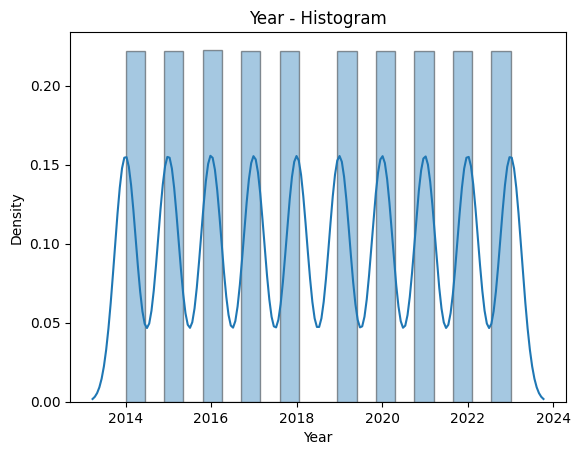


Month


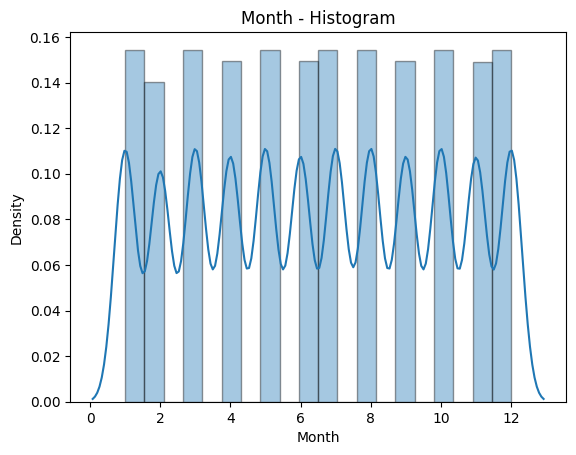


Primary Demand - Petajoules


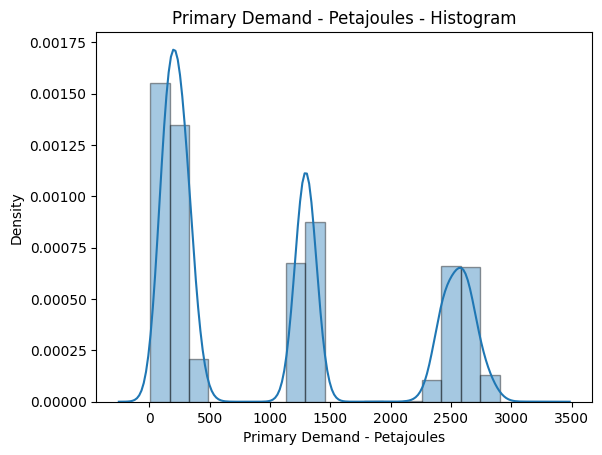


Electricity Generation - (GWh)


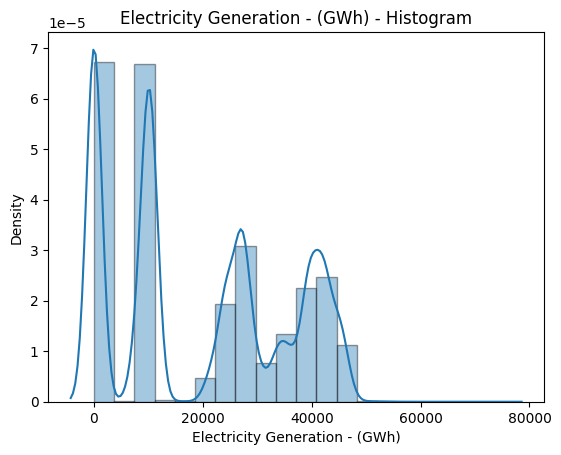


Electricity Capacity - (GWh)


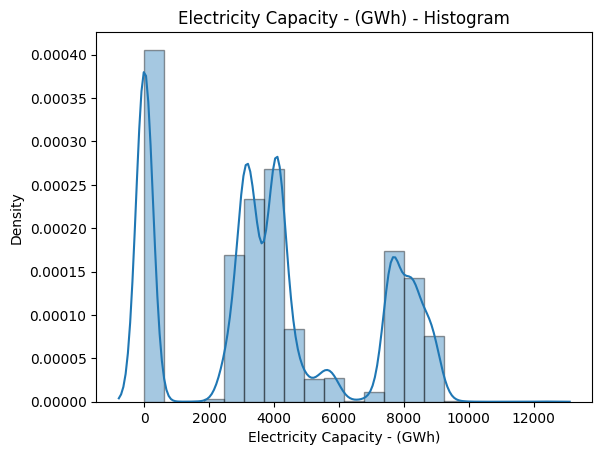


Interchange (GWh)


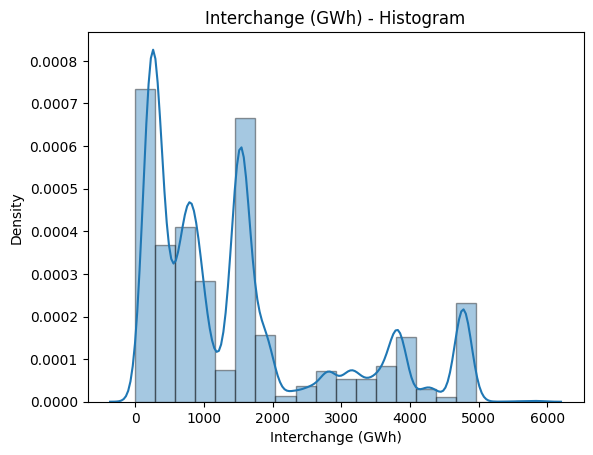


End-Use Demand (PetaJoules)


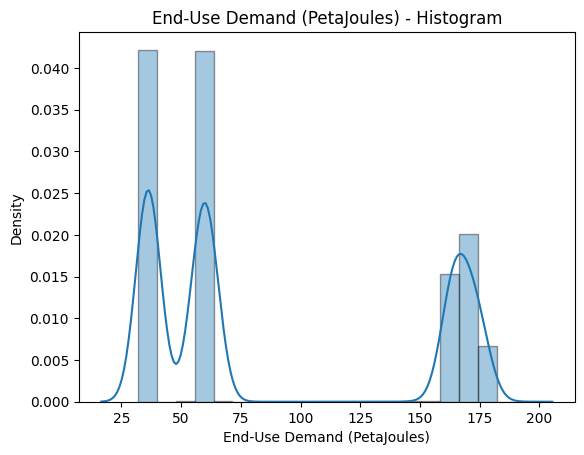


GHG Emisions (KTons_CO2_Equivalent)


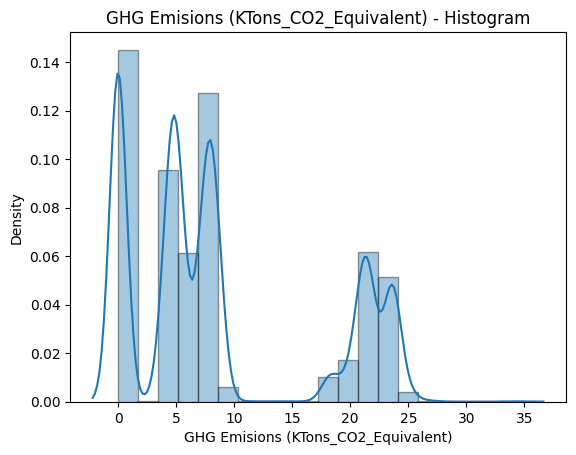


Population


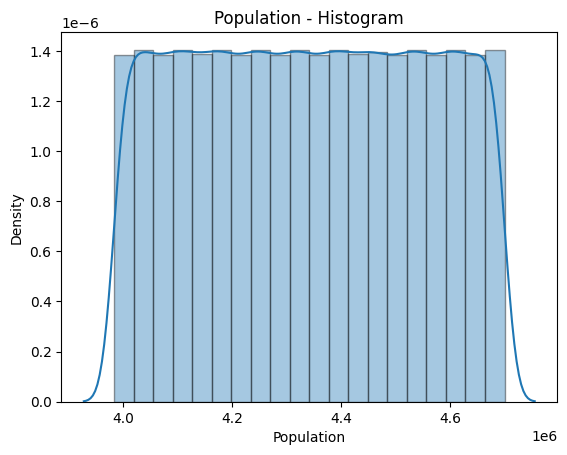


Real Gross Domestic Product ($2012 Millions)


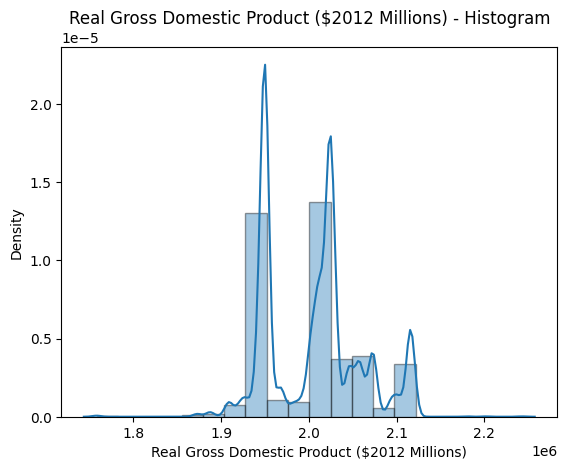


Temp_Max (°F)


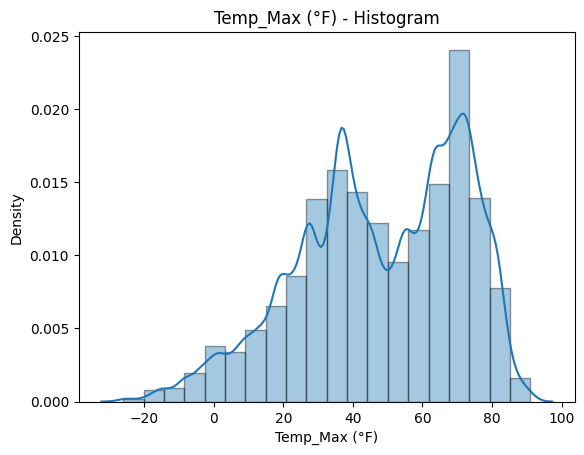


Temp_Avg (°F)


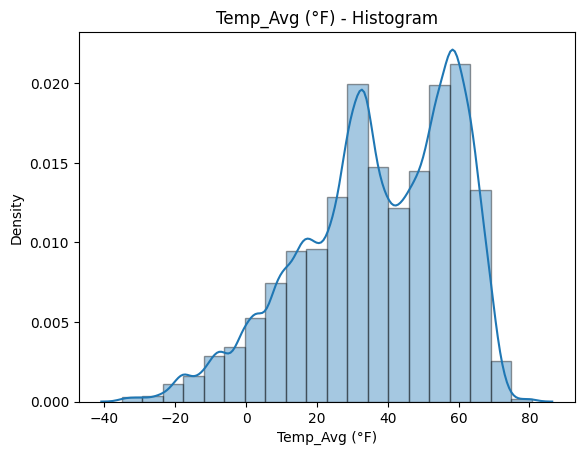


Temp_Min (°F)


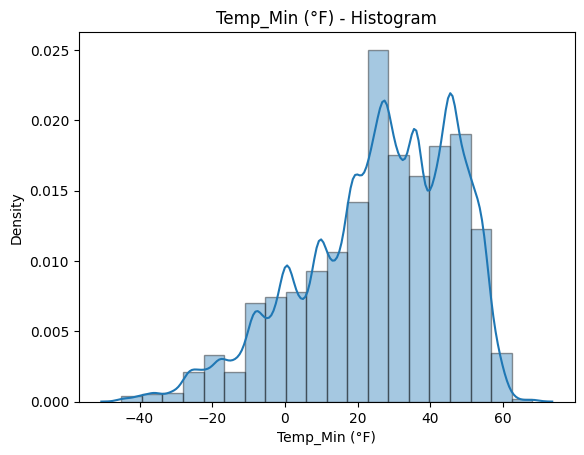


Hum_Max (%)


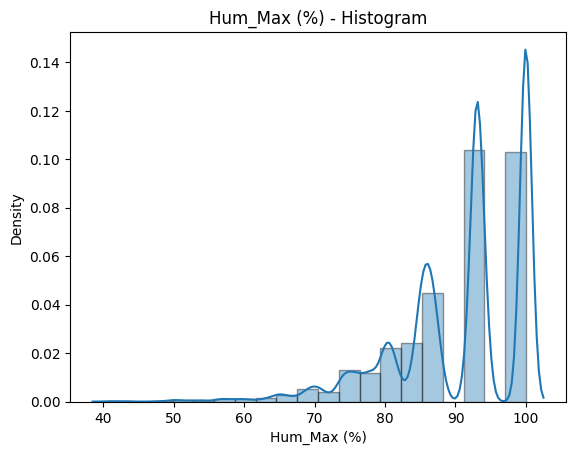


Hum_Avg (%)


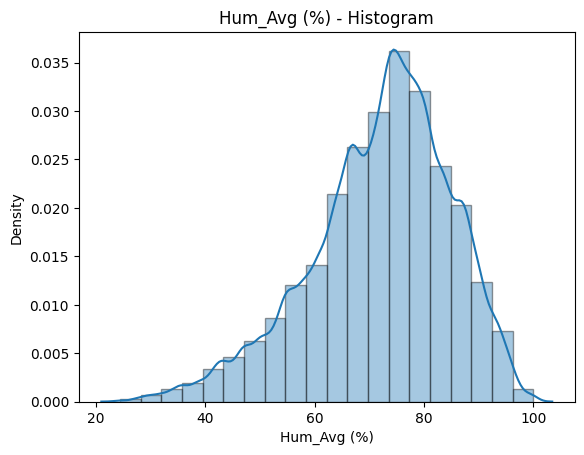


Hum_Min (%)


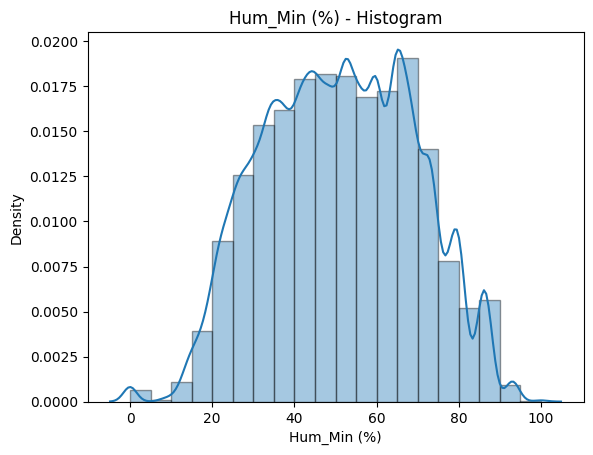


Wind_Speed_Max (mph)


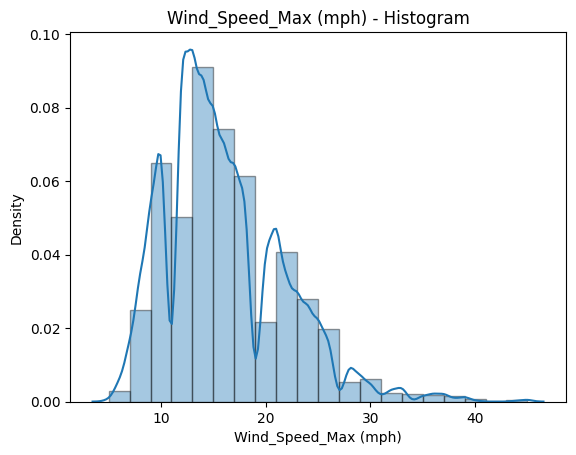


Wind_Speed_Avg (mph)


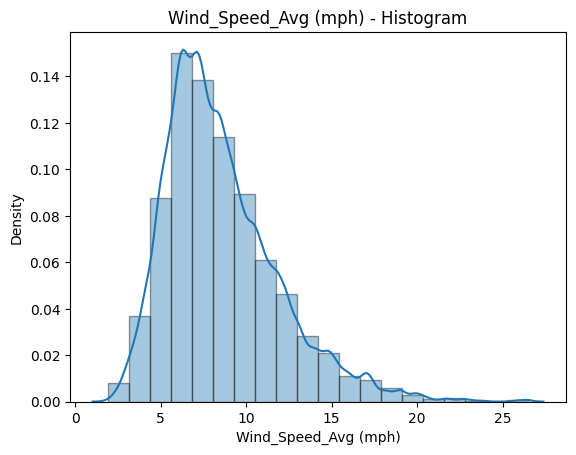


Wind_Speed_Min (mph)


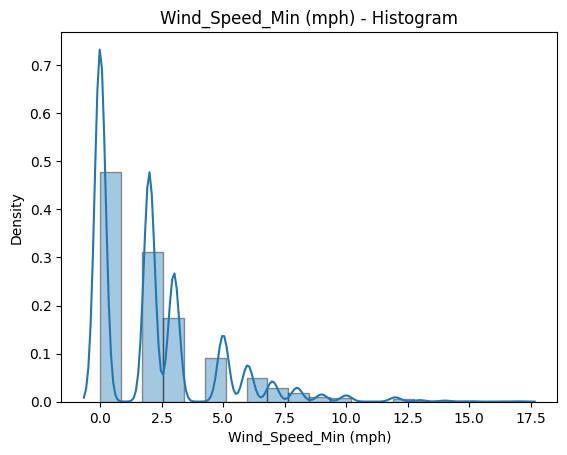


Price (CAD $/KWh)


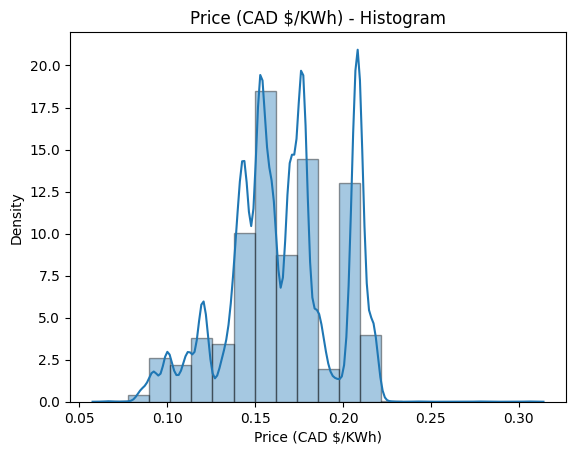

In [ ]:
for col in list(df.columns):
    if df[col].dtype != 'object':
       print(col)
       #plt.figure(figsize=(10,5))
       sns.distplot(a = df[col], bins=20,
                    hist_kws={"edgecolor": 'black'})
       plt.xlabel(col)
       #plt.ylabel('Frequency')
       plt.title(col+ ' - Histogram')
       plt.show()
       print()

#### **3.1.2 - Boxplots**

##### ***3.1.2.1 - Boxplot of each Numerical Variable***

Year


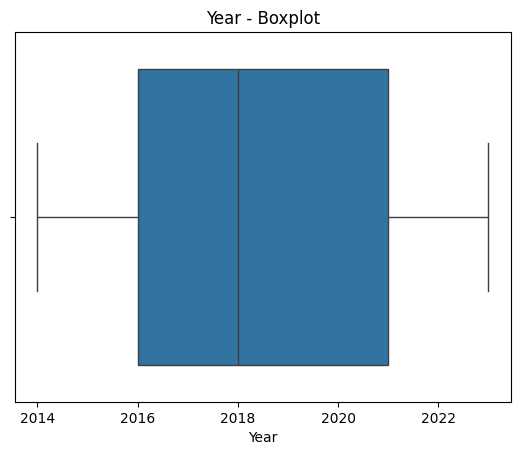


Month


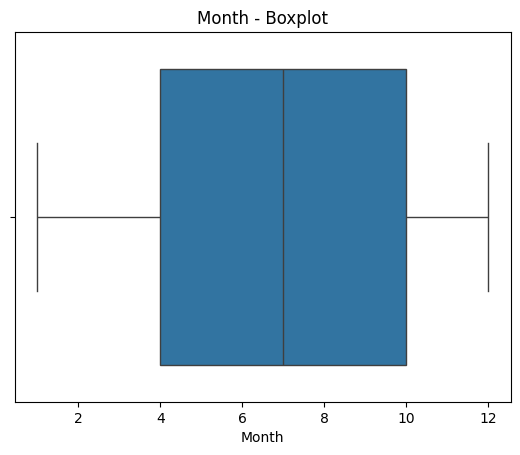


Primary Demand - Petajoules


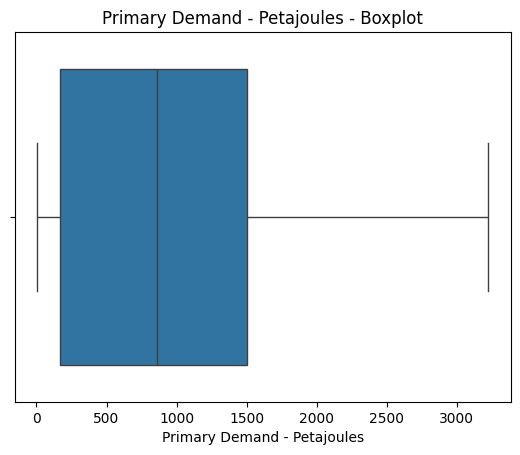


Electricity Generation - (GWh)


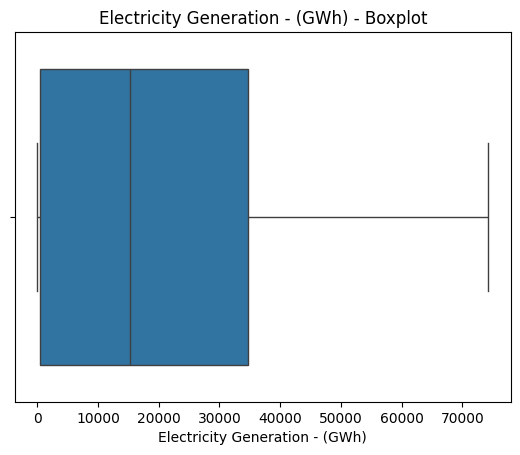


Electricity Capacity - (GWh)


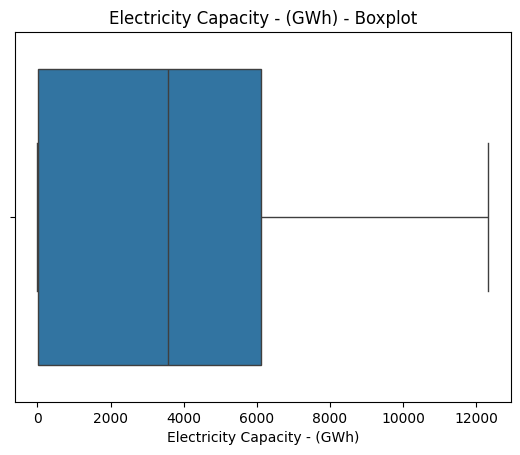


Interchange (GWh)


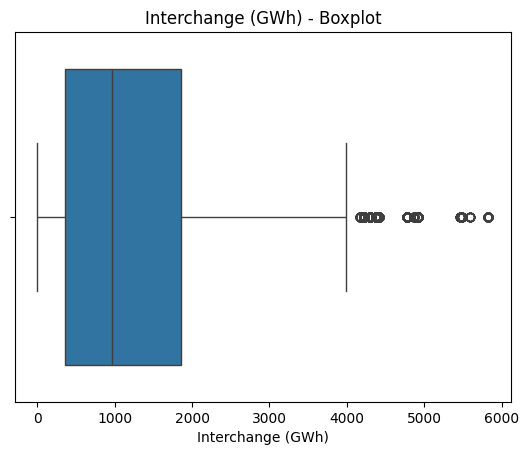


End-Use Demand (PetaJoules)


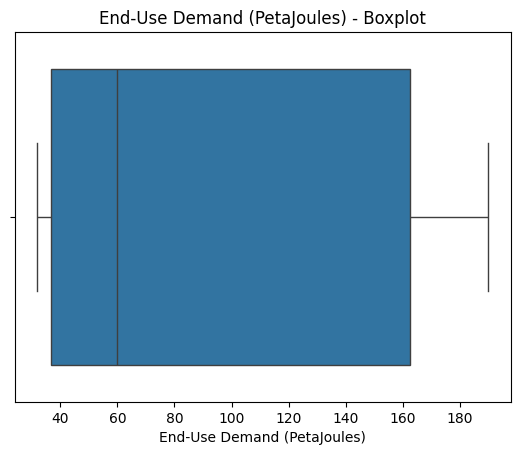


GHG Emisions (KTons_CO2_Equivalent)


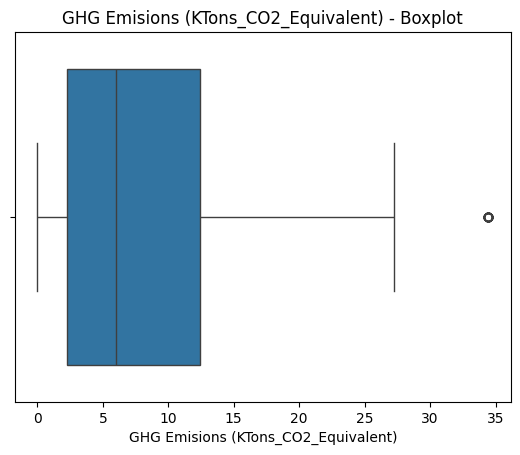


Population


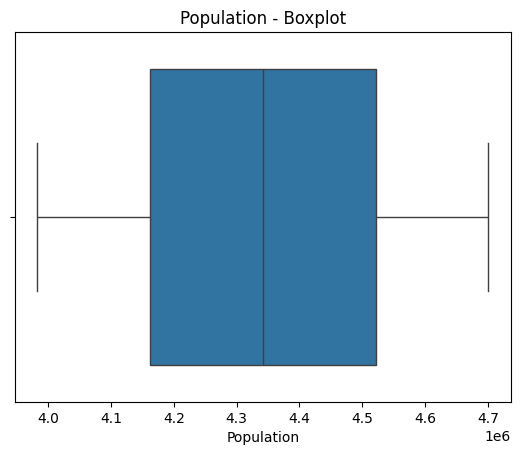


Real Gross Domestic Product ($2012 Millions)


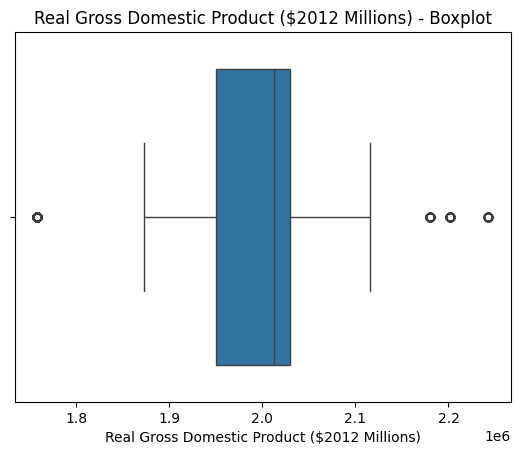


Temp_Max (°F)


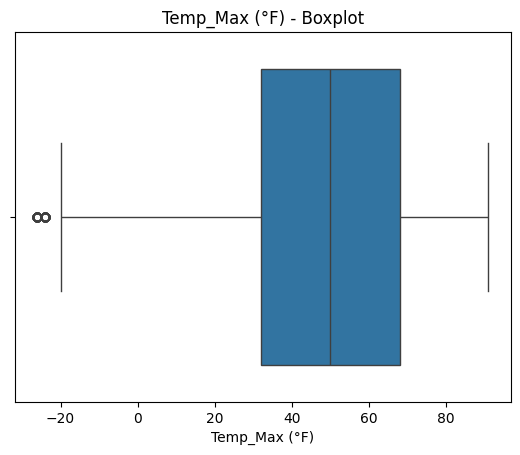


Temp_Avg (°F)


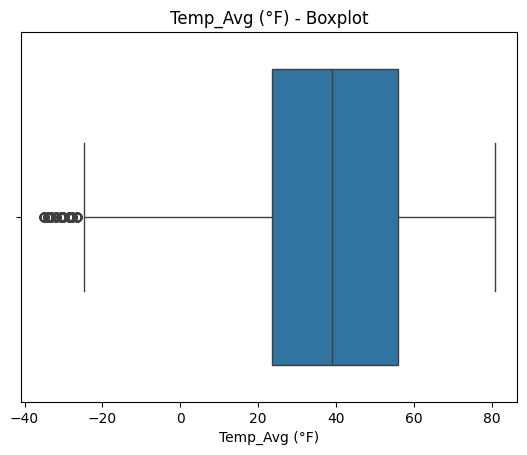


Temp_Min (°F)


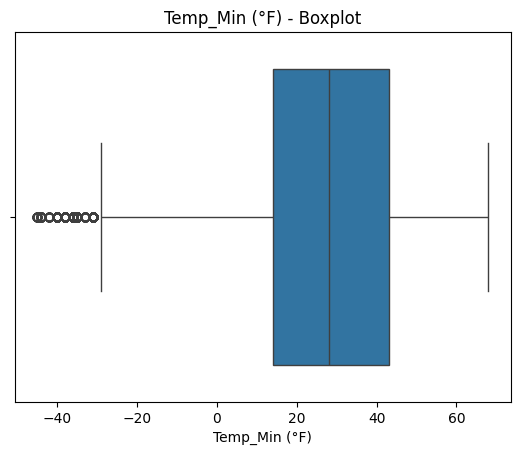


Hum_Max (%)


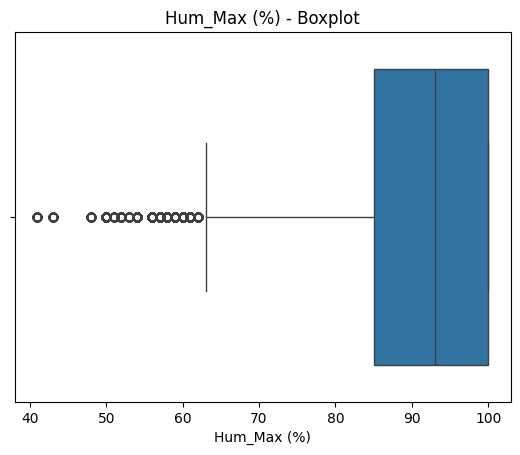


Hum_Avg (%)


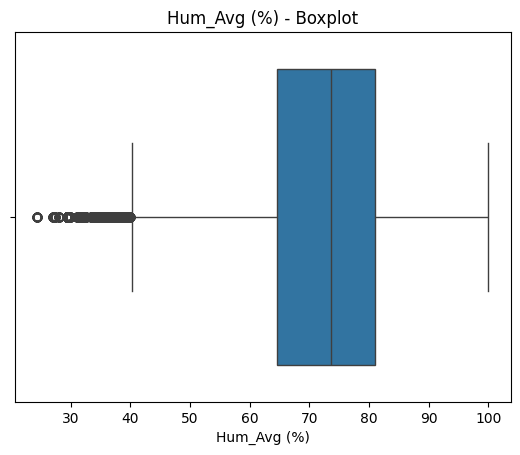


Hum_Min (%)


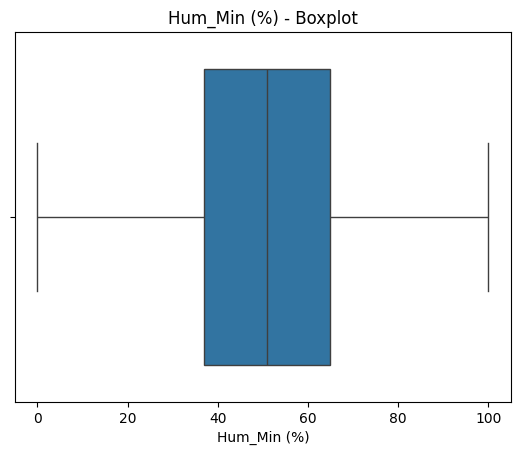


Wind_Speed_Max (mph)


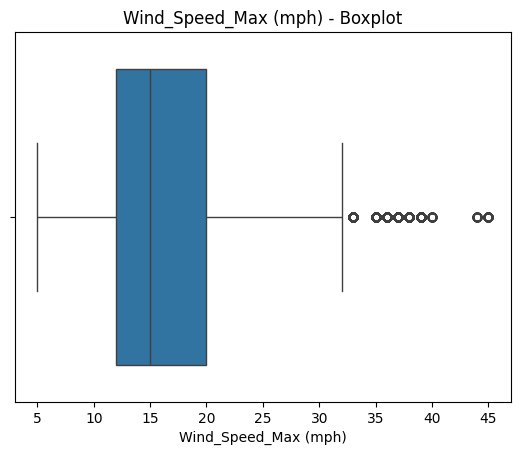


Wind_Speed_Avg (mph)


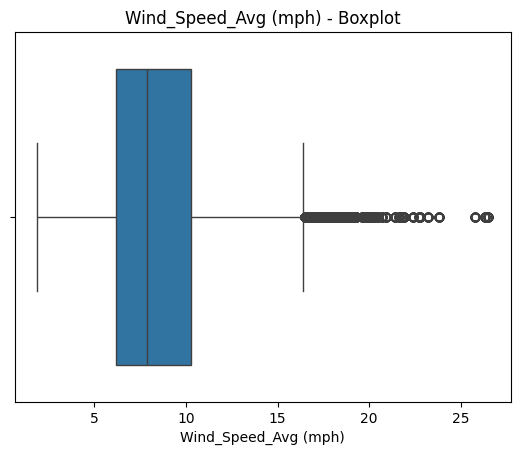


Wind_Speed_Min (mph)


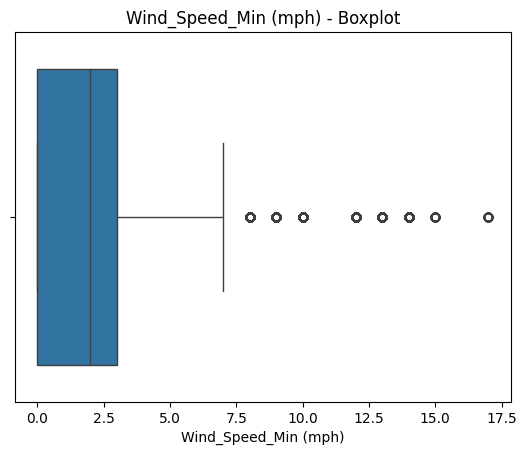


Price (CAD $/KWh)


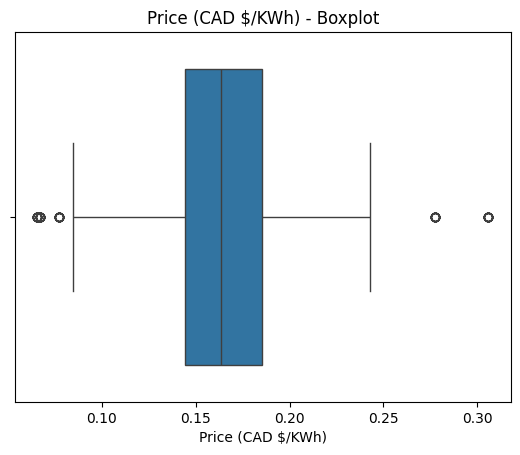

In [ ]:
for col in list(df.columns):
    if df[col].dtype != 'object':
       print(col)
       #plt.figure(figsize=(10,5))
       sns.boxplot(x=df[col])
       plt.xlabel(col)
       #plt.ylabel('Frequency')
       plt.title(col+ ' - Boxplot')
       plt.show()
       print()

##### ***3.1.2.2 - Boxplot of "Price" vs "Scenario" per each Categoeical Variable***

Day


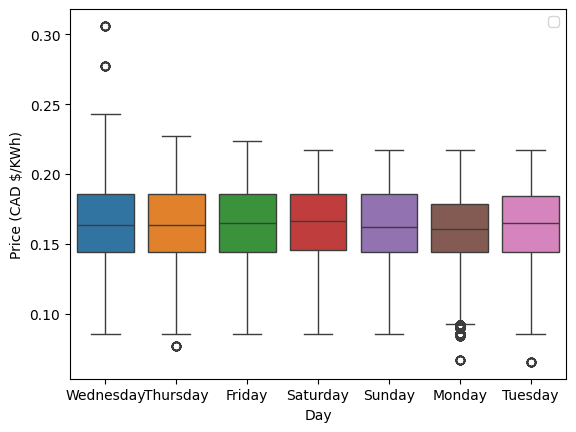


Clean_Energy


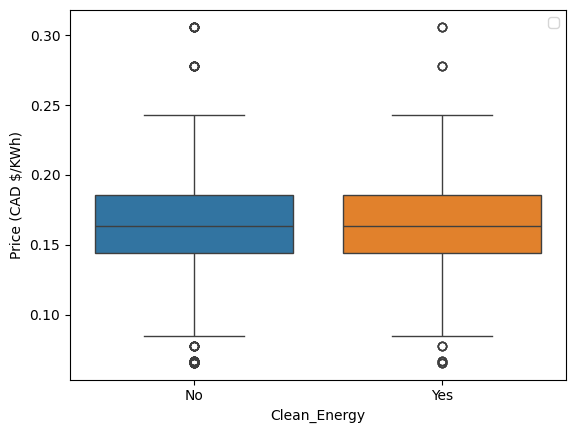


Sources


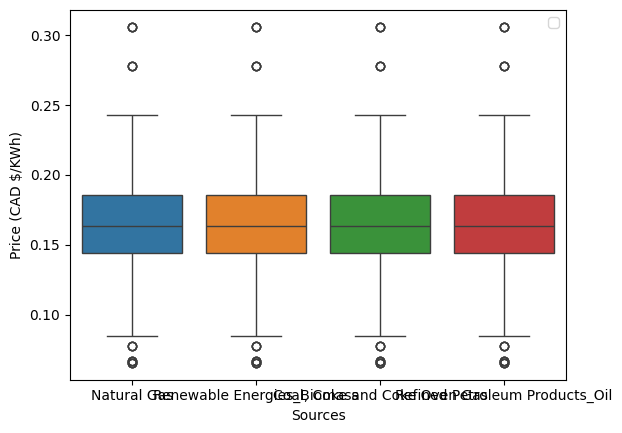


Interchange Flows


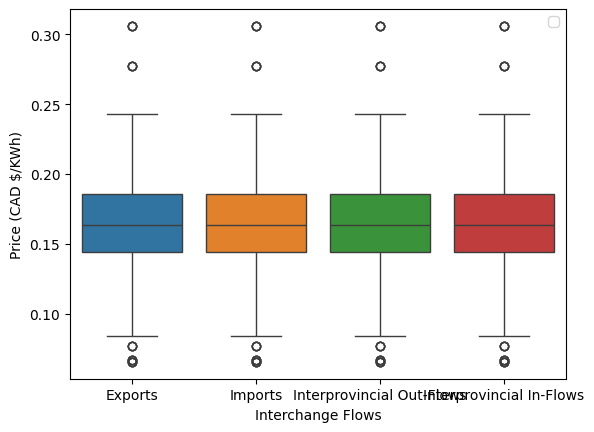


Sector


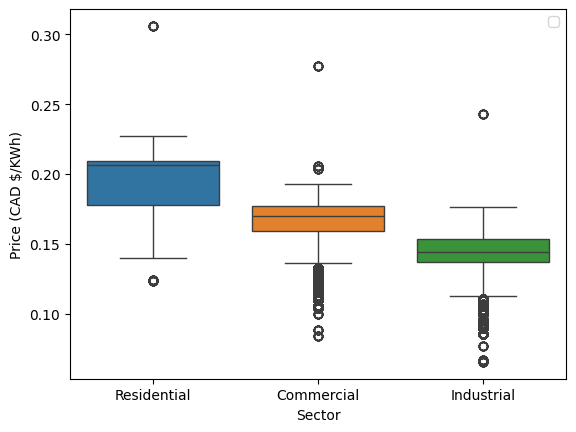

In [ ]:
for col in list(df.columns):
  if df[col].dtype == 'object' and 'Time' not in col:
    print(col)
    #plt.figure(figsize=(15,5))
    sns.boxplot(data=df, x=col, y=target_, hue=col)
    plt.legend(loc='upper right')
    plt.show()
    print()

### **3.2 - Histrograms - Catgorical Variables**

#### **3.2.1 - Histrogram per Category**

In [ ]:
df.groupby(['Sector'])[target_].aggregate('mean')

Sector
Commercial     0.162390
Industrial     0.139153
Residential    0.194420
Name: Price (CAD $/KWh), dtype: float64

In [ ]:
df.groupby(['Sources'])[target_].aggregate('mean')

Sources
Coal, Coke and Coke Oven Gas      0.165321
Natural Gas                       0.165321
Refined Petroleum Products_Oil    0.165321
Renewable Energies_Biomass        0.165321
Name: Price (CAD $/KWh), dtype: float64

In [ ]:
df.groupby(['Interchange Flows'])[target_].aggregate('mean')

Interchange Flows
Exports                      0.165321
Imports                      0.165321
Interprovincial In-Flows     0.165321
Interprovincial Out-Flows    0.165321
Name: Price (CAD $/KWh), dtype: float64

In [ ]:
df.groupby(['Clean_Energy'])[target_].aggregate('mean')

Clean_Energy
No     0.165321
Yes    0.165321
Name: Price (CAD $/KWh), dtype: float64

In [ ]:
df.groupby(['Day'])[target_].aggregate('mean')

Day
Friday       0.165559
Monday       0.164289
Saturday     0.166243
Sunday       0.165143
Thursday     0.165242
Tuesday      0.165321
Wednesday    0.165446
Name: Price (CAD $/KWh), dtype: float64

In [ ]:
df.drop(columns=['Day', 'Clean_Energy', 'Interchange Flows'], axis=1, inplace=True)

periods = ['Year', 'Month', 'Day']
for period_ in periods:
  print(df.groupby([period_])[target_].aggregate('mean'))

Sources


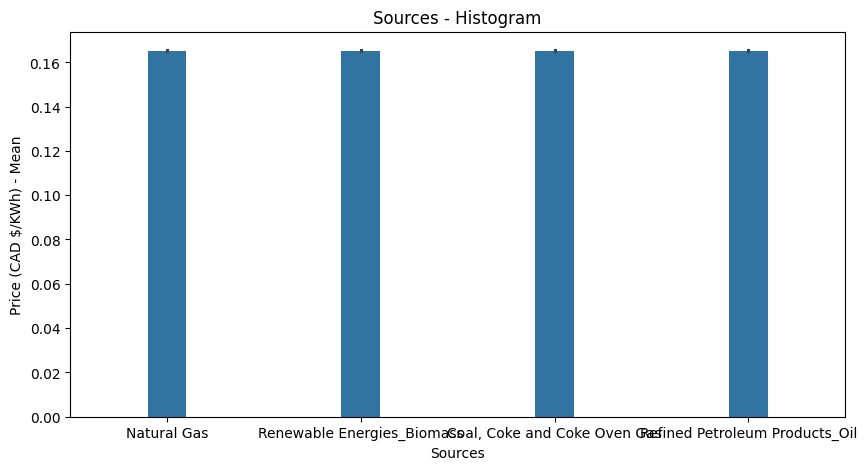


Sector


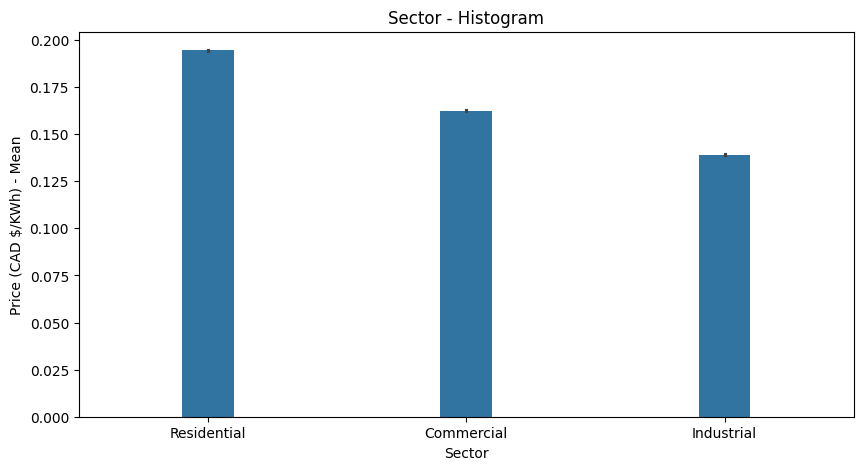

In [ ]:
for col in list(df.columns):
  if df[col].dtype == 'object' and 'Time' not in col:
    print(col)
    plt.figure(figsize=(10,5))
    sns.barplot(df, x=col, y = target_, width=0.2)
    plt.xlabel(col)
    plt.ylabel(target_ + ' - Mean')
    plt.title(col+ ' - Histogram')
    plt.show()
    print()

#### **3.2.2 - Histrogram of Scenario vs Other Categories**

Sources


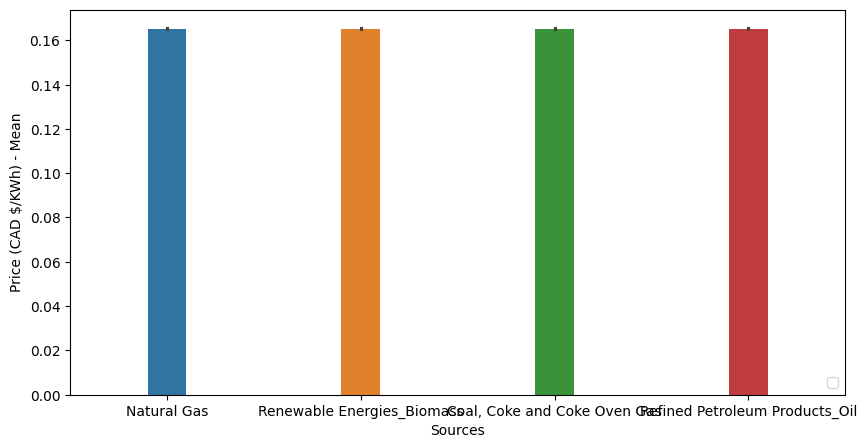


Sector


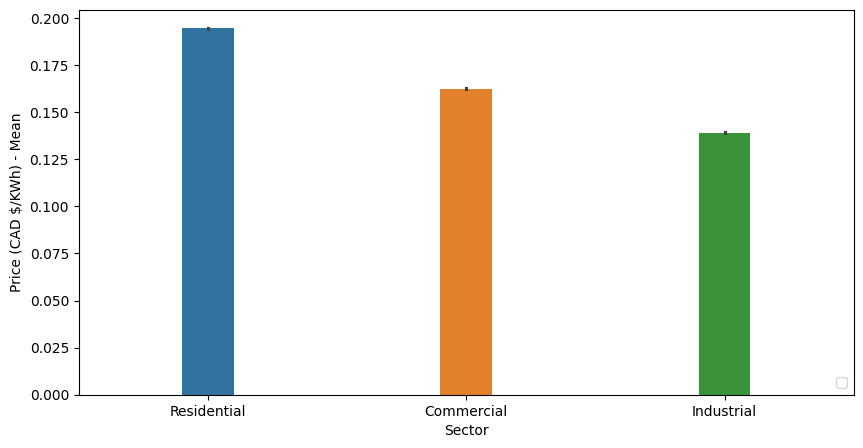

In [ ]:
for col in list(df.columns):
  if df[col].dtype == 'object' and 'Time' not in col:
    print(col)
    plt.figure(figsize=(10,5))
    sns.barplot(df, x =col, y = target_, hue = col, width=0.2)
    #plt.xlabel(col)
    plt.ylabel(target_ + ' - Mean')
    #plt.title(col+ ' - Histogram')
    plt.legend(loc='lower right')
    plt.show()
    print()

### **3.3 - Temporal Plots**

scenarios_ = df['Scenario'].unique().tolist()
scenarios_

In [ ]:
temp = df[df['Sector']=='Residential']#) & (df['Sources']=='Natural Gas') & (df['Interchange Flows']=='Exports')]
temp.index = pd.to_datetime(temp['Time'])
temp.sort_index(axis=0, ascending=True, inplace=True)

plt.figure(figsize = (20,8))
ax = plt.gca()
# Plotting both the curves simultaneously
plt.plot(temp[temp['Scenario'] == scenarios_[0]].index, temp[temp['Scenario'] == scenarios_[0]][target_], color='b', label = scenarios_[0])
plt.plot(temp[temp['Scenario'] == scenarios_[1]].index, temp[temp['Scenario'] == scenarios_[1]][target_], color='r', label = scenarios_[1])
plt.plot(temp[temp['Scenario'] == scenarios_[2]].index, temp[temp['Scenario'] == scenarios_[2]][target_], color='k', label = scenarios_[2])

# Naming the x-axis, y-axis and the whole graph
ax.xaxis.set_major_locator(mdates.YearLocator(1, month = 12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.xlabel("Timestamp")
plt.ylabel(target_)
plt.legend()
plt.show()

### **3.4 - Scatterplots**

In [ ]:
for col in list(df.columns):
  if df[col].dtype.kind in 'iufc' and col !=target_:
    print(col)
    plt.figure(figsize=(15,5))
    sns.scatterplot(data=df, x=col, y=target_, hue="Sector", palette="deep")
    plt.xlabel(col)
    plt.ylabel(target_ + ' - Mean')
    #plt.title(col+ ' - Histogram')
    plt.legend(loc='upper right')
    plt.show()
    print()

Output hidden; open in https://colab.research.google.com to view.

## **4 - Checking Correlation with Target**

### **4.1 - Categorical Variables**

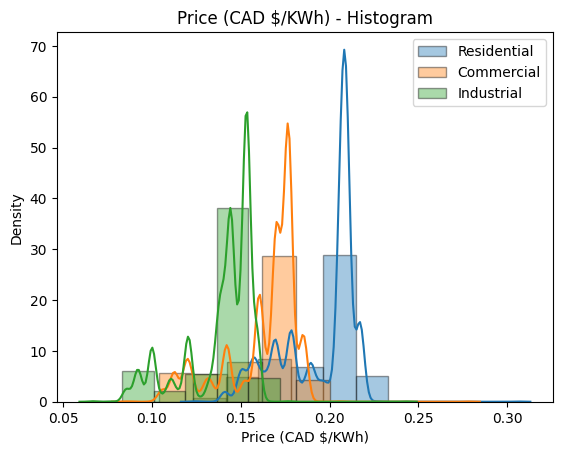

In [ ]:
for sector_ in df['Sector'].unique().tolist():
  sns.distplot(a = df[df['Sector']==sector_][target_], bins = 10, hist_kws={"edgecolor": 'black'}, label =sector_)
plt.xlabel(col)
plt.title(target_+ ' - Histogram')
plt.legend()
plt.show()

In [ ]:
for sector_ in df['Sector'].unique().tolist():
  print('%s ===> Mean = %.3f'%(sector_, df[df['Sector']==sector_][target_].mean()))

Residential ===> Mean = 0.194
Commercial ===> Mean = 0.162
Industrial ===> Mean = 0.139


In [ ]:
#df.rename(columns={target_:'Price', 'Interchange Flows': 'Interchange_Flows'}, inplace=True)
df.rename(columns={target_:'Price'}, inplace=True)
cat_cols = []
for col in list(df.columns):
  if df[col].dtype == 'object' and 'Time' not in col:
    print(col)
    cat_cols.append(col)

Sources
Sector


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
for col in cat_cols:
  print(col)
  model = ols('Price' + ' ~ ' + col, data=df).fit()
  result_anova = sm.stats.anova_lm(model) # ANOVA Test
  print(result_anova)
  print()

Sources
                df        sum_sq       mean_sq             F  PR(>F)
Sources        3.0  5.605504e-28  1.868501e-28  2.009938e-25     1.0
Residual  175244.0  1.629124e+02  9.296316e-04           NaN     NaN

Sector
                df     sum_sq    mean_sq             F  PR(>F)
Sector         2.0  89.964989  44.982495  108063.62195     0.0
Residual  175245.0  72.947372   0.000416           NaN     NaN



### **4.2 - Numerical Variables**

In [ ]:
df['Time'] = pd.to_numeric(pd.to_datetime(df['Time']))

In [ ]:
#df.rename(columns={'Price':target_, 'Interchange_Flows':'Interchange Flows'}, inplace=True)
df.rename(columns={'Price':target_}, inplace=True)
#
num_cols = []
for col in list(df.columns):
  if df[col].dtype != 'object':# and 'Time' not in col:  df[col].dtype.kind in 'iufc'
    print(col)
    num_cols.append(col)

Year
Month
Time
Primary Demand - Petajoules
Electricity Generation - (GWh)
Electricity Capacity - (GWh)
Interchange (GWh)
End-Use Demand (PetaJoules)
GHG Emisions (KTons_CO2_Equivalent)
Population
Real Gross Domestic Product ($2012 Millions)
Temp_Max (°F)
Temp_Avg (°F)
Temp_Min (°F)
Hum_Max (%)
Hum_Avg (%)
Hum_Min (%)
Wind_Speed_Max (mph)
Wind_Speed_Avg (mph)
Wind_Speed_Min (mph)
Price (CAD $/KWh)


plt.figure(figsize=(18,18))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

#### **4.2.1 - Predictive Power Score**

In [ ]:
!pip show pandas
clear_output()

In [ ]:
# Predictive Power Score (PPS)
!pip install -U ppscore
clear_output()
import ppscore as pps

for col in num_cols[:-1]:
  pps_ = pps.score(df, col, target_)['ppscore']
  print('%s => corr_ = %.3f' % (col, pps_))

In [ ]:
#pps.matrix(df)
pps.matrix(df[num_cols])

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Year,Year,1.000000,predict_itself,True,None,0.000000e+00,1.000000e+00,None
1,Year,Month,0.000000,regression,True,mean absolute error,2.983800e+00,2.991018e+00,DecisionTreeRegressor()
2,Year,Time,0.900050,regression,True,mean absolute error,7.893184e+16,7.889224e+15,DecisionTreeRegressor()
3,Year,Primary Demand - Petajoules,0.000000,regression,True,mean absolute error,8.522674e+02,8.585429e+02,DecisionTreeRegressor()
4,Year,Electricity Generation - (GWh),0.000000,regression,True,mean absolute error,1.439981e+04,1.441550e+04,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
436,Price (CAD $/KWh),Hum_Min (%),0.674636,regression,True,mean absolute error,1.530300e+01,4.979049e+00,DecisionTreeRegressor()
437,Price (CAD $/KWh),Wind_Speed_Max (mph),0.005847,regression,True,mean absolute error,4.259400e+00,4.234494e+00,DecisionTreeRegressor()
438,Price (CAD $/KWh),Wind_Speed_Avg (mph),0.010884,regression,True,mean absolute error,2.454080e+00,2.427370e+00,DecisionTreeRegressor()
439,Price (CAD $/KWh),Wind_Speed_Min (mph),0.000000,regression,True,mean absolute error,1.770600e+00,1.834067e+00,DecisionTreeRegressor()


plt.figure(figsize=(12,12))
matrix_df = pps.matrix(df[num_cols])[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
matrix_df = matrix_df.reindex(num_cols)
matrix_df = matrix_df[num_cols]
#
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.show()

#### **4.2.2 - Filtering Out Numerical Features Based on PPS Criterion**

In [ ]:
pps.score(df, target_, 'Sector')['ppscore']

0.986806665273788

In [ ]:
# 1 - Removing nonimportant columns that do not have a significant correlation with the target
for col in num_cols[:-1]:
  pps_ = pps.score(df, target_, col)['ppscore']
  if pps_>0.3:
    print(col)
    print(pps_)

End-Use Demand (PetaJoules)
0.9865638503265666
GHG Emisions (KTons_CO2_Equivalent)
0.3144934362458627
Real Gross Domestic Product ($2012 Millions)
0.9701062413852432
Temp_Max (°F)
0.679524756124169
Temp_Avg (°F)
0.6754361311913704
Temp_Min (°F)
0.6120922622841796
Hum_Avg (%)
0.49513482419922894
Hum_Min (%)
0.674635744885962


In [ ]:
!pip install minepy
clear_output()
from minepy import MINE

In [ ]:
mine = MINE(alpha=0.6, c=15, est='mic_approx')
for col in num_cols[:-1]:
  mine.compute_score(df[col], df[target_])
  score_ = round(mine.mic(),2)
  if score_ > 0.3:
    print(col)
    print(score_)

In [ ]:
# 2 - Integrating categorical features with the remaining numerical features
pred_cols = []
[pred_cols.append(col) for col in list(df.columns) if df[col].dtype == 'O' or col in num_cols] #'Time' not in col and
pred_cols

['Year',
 'Month',
 'Sources',
 'Time',
 'Primary Demand - Petajoules',
 'Electricity Generation - (GWh)',
 'Electricity Capacity - (GWh)',
 'Interchange (GWh)',
 'Sector',
 'End-Use Demand (PetaJoules)',
 'GHG Emisions (KTons_CO2_Equivalent)',
 'Population',
 'Real Gross Domestic Product ($2012 Millions)',
 'Temp_Max (°F)',
 'Temp_Avg (°F)',
 'Temp_Min (°F)',
 'Hum_Max (%)',
 'Hum_Avg (%)',
 'Hum_Min (%)',
 'Wind_Speed_Max (mph)',
 'Wind_Speed_Avg (mph)',
 'Wind_Speed_Min (mph)',
 'Price (CAD $/KWh)']

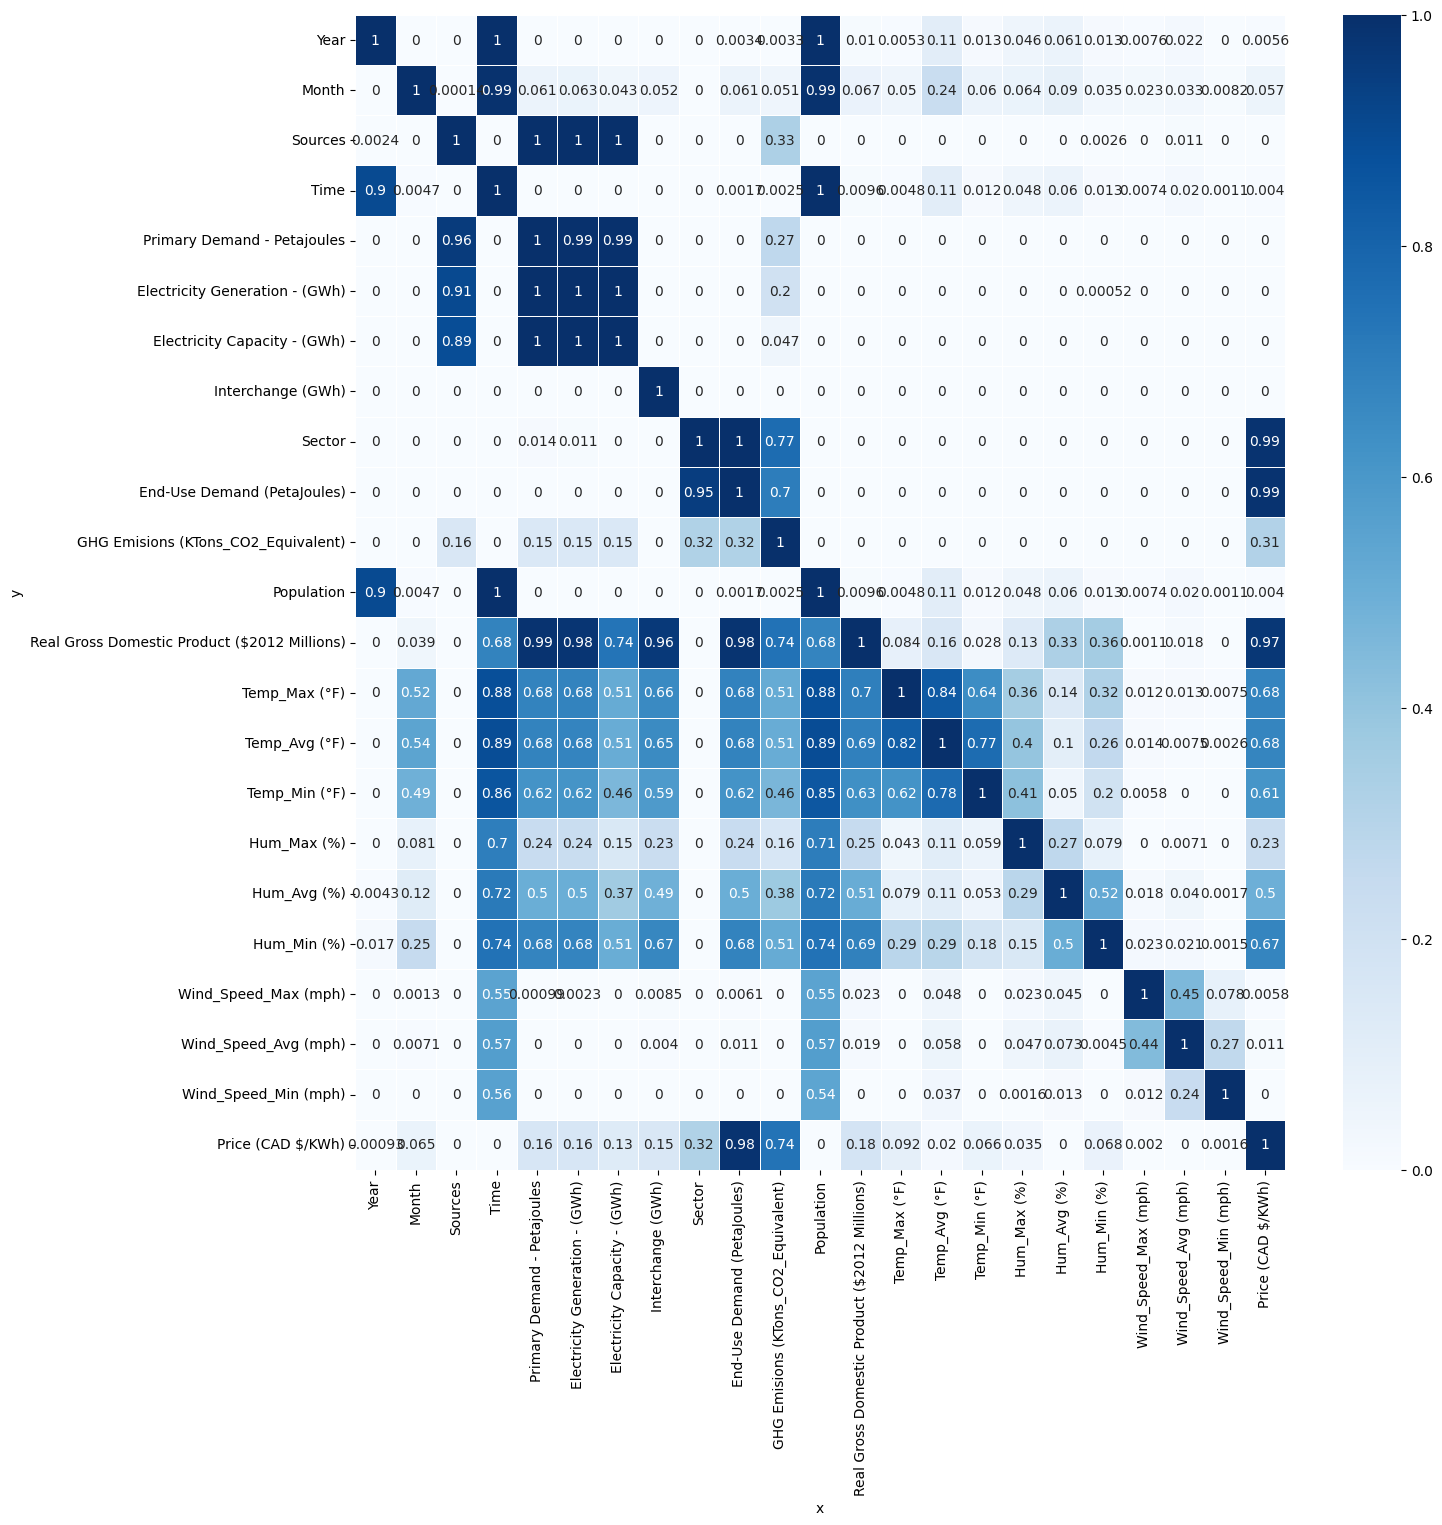

In [ ]:
plt.figure(figsize=(15,15))
matrix_df = pps.matrix(df[pred_cols])[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
matrix_df = matrix_df.reindex(pred_cols)
matrix_df = matrix_df[pred_cols]
#
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.show()

In [ ]:
# 3 - Removing features that have a strong correlation with other features
del_cols = [#'Sources',
            'Year', 'Month',
            'Time', 'Primary Demand - Petajoules',
            'Electricity Generation - (GWh)', 'Electricity Capacity - (GWh)',
            'Interchange (GWh)',
            'Population', #'Temp_Avg (°F)',
            'Hum_Max (%)',# 'Hum_Avg (%)', 'Hum_Min (%)',
            'Wind_Speed_Max (mph)',
            'Wind_Speed_Avg (mph)', 'Wind_Speed_Min (mph)',
            ]
[pred_cols.remove(col) for col in del_cols]
pred_cols

['Sources',
 'Sector',
 'End-Use Demand (PetaJoules)',
 'GHG Emisions (KTons_CO2_Equivalent)',
 'Real Gross Domestic Product ($2012 Millions)',
 'Temp_Max (°F)',
 'Temp_Avg (°F)',
 'Temp_Min (°F)',
 'Hum_Avg (%)',
 'Hum_Min (%)',
 'Price (CAD $/KWh)']

In [ ]:
ds = df[pred_cols]
ds.dtypes

Sources                                          object
Sector                                           object
End-Use Demand (PetaJoules)                     float64
GHG Emisions (KTons_CO2_Equivalent)             float64
Real Gross Domestic Product ($2012 Millions)    float64
Temp_Max (°F)                                     int64
Temp_Avg (°F)                                   float64
Temp_Min (°F)                                     int64
Hum_Avg (%)                                     float64
Hum_Min (%)                                       int64
Price (CAD $/KWh)                               float64
dtype: object

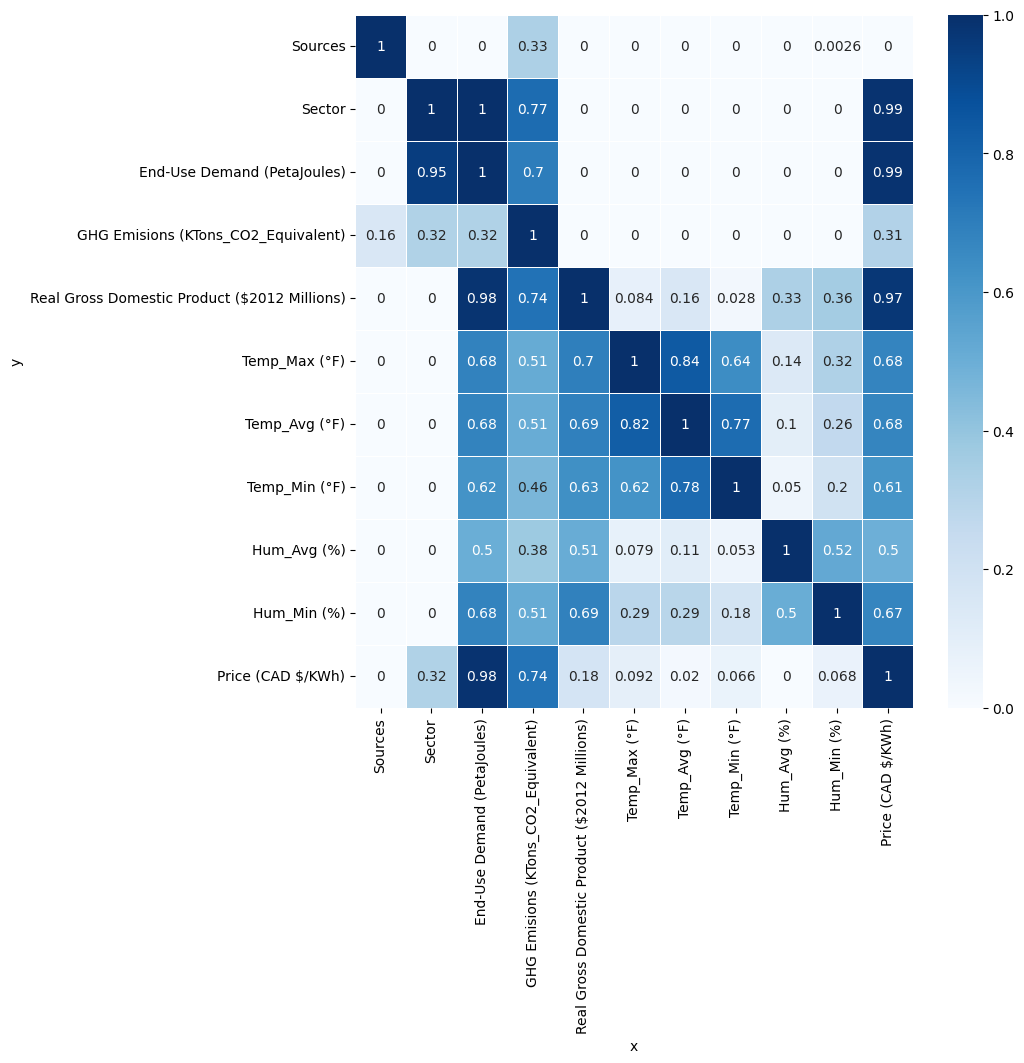

In [ ]:
plt.figure(figsize=(9,9))
matrix_ds = pps.matrix(ds[pred_cols])[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
matrix_ds = matrix_ds.reindex(pred_cols)
matrix_ds = matrix_ds[pred_cols]
#
sns.heatmap(matrix_ds, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
corr_matrix = ds[pred_cols].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

mat_cat = pps.matrix(df)
mat_cat[mat_cat['y']=='Price (CAD $/MWh)']

## **5 - Generating Final Dataset for ML Modelling**

In [ ]:
cols_ = ['Time']
for col in pred_cols:
  cols_.append(col)
ds = df[cols_]
ds['Time'] = pd.to_datetime(ds['Time'])
ds.head(5)

,Time,Sources,Sector,End-Use Demand (PetaJoules),GHG Emisions (KTons_CO2_Equivalent),Real Gross Domestic Product ($2012 Millions),Temp_Max (°F),Temp_Avg (°F),Temp_Min (°F),Hum_Avg (%),Hum_Min (%),Price (CAD $/KWh)
0,2014-01-01,Natural Gas,Residential,38.3800,4.607213,2012904.75,12,4.5,-2,79.6,72,0.178083
2,2014-01-01,Renewable Energies_Biomass,Residential,38.3800,0.000000,2012904.75,12,4.5,-2,79.6,72,0.178083
5,2014-01-01,"Coal, Coke and Coke Oven Gas",Commercial,61.3625,7.478482,2012904.75,12,4.5,-2,79.6,72,0.159471
6,2014-01-01,"Coal, Coke and Coke Oven Gas",Industrial,173.6425,20.854401,2012904.75,12,4.5,-2,79.6,72,0.139932
7,2014-01-01,"Coal, Coke and Coke Oven Gas",Residential,38.3800,4.607213,2012904.75,12,4.5,-2,79.6,72,0.178083


In [ ]:
#df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
vv

In [ ]:
ds.to_excel('MLM_Alberta_EP_Daily_Hum.xlsx', index=False, freeze_panes=(1,0))
files.download('MLM_Alberta_EP_Daily_Hum.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install plotly
import plotly.graph_objects as go

In [ ]:
#import plotly.graph_objects as go
fig = go.Figure()

In [ ]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = 17.5,
    title = {'text': "Electricity Price (CAD Cents/KWh)"},
    domain = {'x': [0, 1], 'y': [0, 1]},
    gauge = {'axis': {'range': [10, 20]}}
))

fig.show()
# https://plotly.com/python/indicator/
# https://plotly.com/python/gauge-charts/
# https://docs.streamlit.io/develop/api-reference/charts/st.plotly_chart

In [ ]:
!pip install altair
import altair as alt

In [ ]:
source2 = alt.sequence(start=0, stop=28, step=1, as_='x')
double2 = alt.Chart(source2).mark_line().transform_calculate(
    double2='5*pow(2,(datum.x/2))'
).transform_fold(
    ['double2']
).encode(
    x='x:Q',
    y=alt.Y('value:Q'),# scale=alt.Scale(type='log')),
    color=alt.value('lightgray')
)

text2 = alt.Chart({'values':[{'x': 20, 'y': 7000}]}).mark_text(
    text='doubles every 2 days', angle=0
).encode(
    x='x:Q', y='y:Q'
)

double2 + text2

## **Others**

In [ ]:
from scipy.stats import spearmanr
df.rename(columns={'Price':target_, 'Interchange_Flows':'Interchange Flows'}, inplace=True)

In [ ]:
########## Spearman’s Correlation
for col in num_cols[:-1]:
  corr, _ = spearmanr(df[col], df[target_])
  print('%s => corr_ = %.3f' % (col,corr))

for col in num_cols:
    print(col)
    if col == target_:
       list_ = []
       for col1 in num_cols[:-1]:
           pps_ = pps.score(df, col1, col)['ppscore']
           if pps_>0.55:
             list_.append(col1)
    #print('%s has a strong dependance to: %s' %(col, list_))
       print(list_)
    else:
       list_ = []
       for col1 in num_cols[:-1]:
           pps_ = pps.score(df, col1, col)['ppscore']
           if pps_>0.9:
             list_.append(col1)
       list_.remove(col)
       print(list_)
    print()